<a href="https://colab.research.google.com/github/Icetiger1/python/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

#Понижение размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#отбор важных признаков
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler

#кластеризация
from sklearn.cluster import (KMeans,
                             AgglomerativeClustering,
                             DBSCAN)

#Метрики кластеризации
from sklearn.metrics import silhouette_score

#Загрузка данных

In [ ]:
!wget https://www.dropbox.com/s/9t04t1haanbdvvt/bank-data-for-pca.csv?dl=1

--2023-10-17 17:59:56--  https://www.dropbox.com/s/9t04t1haanbdvvt/bank-data-for-pca.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9t04t1haanbdvvt/bank-data-for-pca.csv [following]
--2023-10-17 17:59:57--  https://www.dropbox.com/s/dl/9t04t1haanbdvvt/bank-data-for-pca.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc41d5f47005dbcf5641b6969034.dl.dropboxusercontent.com/cd/0/get/CFwBXV9B-fvrt66MD2zVLwnrsf6zdcln1nGIOM_KCVdbLqJFz1HL0lz6SHynUgWq3_3eu8qIKfMpW0YlbGcBg3iBbQMAsW81lUB6nOEQjIf9nFwU-fkHam4SFPcOihOVCMYREa3cQMTXwXXEP8OXuogr/file?dl=1# [following]
--2023-10-17 17:59:57--  https://uc41d5f47005dbcf5641b6969034.dl.dropboxusercontent.com/cd/0/get/CFwBXV9B-fvrt66MD2zVLwnrsf6zdcln1nGIOM_KCVdbLqJFz1HL0lz6SHynUgWq3_3eu8qIK

In [ ]:
path = '/content/bank-data-for-pca.csv?dl=1'

In [ ]:
data = pd.read_csv(path)
data.head()

,Возраст,Работа,Семейный статус,Образование,Кредитный дефолт,Ипотека,Займ,Контакт,Месяц,День недели,Длительность,Кампания,Предыдущий контакт,Доходность,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании,y
0,27.0,Самозанятый,Не женат / не замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,5,24.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Нет
1,30.0,Преддприниматель,Женат / замужем,Университетская степень,Нет,Нет,Нет,Городской телефон,Октябрь,5,223.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да
2,39.0,Голубой воротничок,Женат / замужем,Базовое (9 классов),Нет,Нет,Нет,Городской телефон,Октябрь,5,270.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да
3,42.0,Менеджер,Женат / замужем,Высшая школа,Нет,Да,Да,Городской телефон,Октябрь,5,103.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да
4,42.0,Самозанятый,Женат / замужем,Базовое (4 класса),Нет,Нет,Нет,Городской телефон,Октябрь,5,478.0,1.0,0.0,Отсутствует,-0.1,93.798,-40.4,5.045,5195.0,Да


In [ ]:
num_data = data[data.describe().columns.to_list()]
num_data.head()

,Возраст,День недели,Длительность,Кампания,Предыдущий контакт,Колебание уровня безработицы,Индекс потребительских цен,Индекс потребительской уверенности,Европейская межбанковская ставка,Количество сотрудников в компании
0,27.0,5,24.0,1.0,0.0,-0.1,93.798,-40.4,5.045,5195.0
1,30.0,5,223.0,1.0,0.0,-0.1,93.798,-40.4,5.045,5195.0
2,39.0,5,270.0,1.0,0.0,-0.1,93.798,-40.4,5.045,5195.0
3,42.0,5,103.0,1.0,0.0,-0.1,93.798,-40.4,5.045,5195.0
4,42.0,5,478.0,1.0,0.0,-0.1,93.798,-40.4,5.045,5195.0


In [ ]:
cols = ['Возраст', 'День недели', 'Длительность',  'Кампания', 'Предыдущий контакт', 'Индекс потребительских цен',
        'Европейская межбанковская ставка',	'Количество сотрудников в компании']
y = data['y']
X = num_data[cols]

#Отбор признаков

In [ ]:
best_features = SelectKBest(score_func = chi2, k = 'all')
fit = best_features.fit(X,y)

In [ ]:
data_scores = pd.DataFrame(fit.scores_)
data_columns = pd.DataFrame(X.columns)
featuresScores = pd.concat([data_columns, data_scores], axis =1)
featuresScores.columns = ['Feature', 'Score']
result = featuresScores.nlargest(5, 'Score')

In [ ]:
result['Feature'].to_list()

['Длительность',
 'Количество сотрудников в компании',
 'Европейская межбанковская ставка',
 'Предыдущий контакт',
 'Кампания']

In [ ]:
scaler = StandardScaler()
data_ = scaler.fit_transform(X[result['Feature'].to_list()])
data_[:2]

array([[-0.90364   ,  0.3892248 ,  0.82085647, -0.34955143, -0.56596326],
       [-0.1361956 ,  0.3892248 ,  0.82085647, -0.34955143, -0.56596326]])

In [ ]:
X_final = pd.DataFrame(data = data_, columns =  result['Feature'].to_list())
X_final.head()

,Длительность,Количество сотрудников в компании,Европейская межбанковская ставка,Предыдущий контакт,Кампания
0,-0.903640,0.389225,0.820856,-0.349551,-0.565963
1,-0.136196,0.389225,0.820856,-0.349551,-0.565963
2,0.045060,0.389225,0.820856,-0.349551,-0.565963
3,-0.598976,0.389225,0.820856,-0.349551,-0.565963
4,0.847213,0.389225,0.820856,-0.349551,-0.565963


#PCA

In [ ]:
pca = PCA(n_components=1)
pca_fit = pca.fit_transform(X_final)
pca_df = pd.DataFrame(data = pca_fit, columns = ['одна компонента'])

In [ ]:
pca_df.head()

,одна компонента
0,-0.861691
1,-0.822133
2,-0.812790
3,-0.845987
4,-0.771443


##Смотрим какая полнота данных при разном кол-е компонент


In [ ]:
for i in range(5):
  pca = PCA(n_components=i)
  pca_fit = pca.fit_transform(X_final)
  pca_df = pd.DataFrame(data = pca_fit)
  print(f'При кол-ве компонент = {i}, дисперсия составит {np.sum(pca.explained_variance_ratio_)}')
  print(pca_df.head())

При кол-ве компонент = 0, дисперсия составит 0.0
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
При кол-ве компонент = 1, дисперсия составит 0.46698326530991263
          0
0 -0.861691
1 -0.822133
2 -0.812790
3 -0.845987
4 -0.771443
При кол-ве компонент = 2, дисперсия составит 0.6761313070420879
          0         1
0 -0.861691 -0.237845
1 -0.822133  0.362384
2 -0.812790  0.504147
3 -0.845987  0.000437
4 -0.771443  1.131523
При кол-ве компонент = 3, дисперсия составит 0.8598202975598099
          0         1         2
0 -0.861691 -0.237845 -1.081728
1 -0.822133  0.362384 -0.605224
2 -0.812790  0.504147 -0.492683
3 -0.845987  0.000437 -0.892563
4 -0.771443  1.131523  0.005372
При кол-ве компонент = 4, дисперсия составит 0.9893444217111518
          0         1         2         3
0 -0.861691 -0.237845 -1.081728  0.137357
1 -0.822133  0.362384 -0.605224  0.143104
2 -0.812790  0.504147 -0.492683  0.144461
3 -0.845987  0.000437 -0.892563  0.139639
4 -0.771443  1.131523  0.005372  0.15

#TSNE

In [ ]:
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
X = digits.data
y = digits.target

In [ ]:
X[0].shape

(64,)

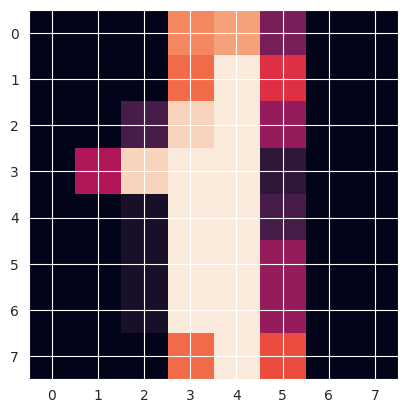

In [ ]:
plt.imshow(X[1].reshape([8,8]))

In [ ]:
y[:3]

array([0, 1, 2])

<ipython-input-56-3302db789ee0>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(t_sne_fit[:,0], t_sne_fit[:, 1],  cmap ='viridis')


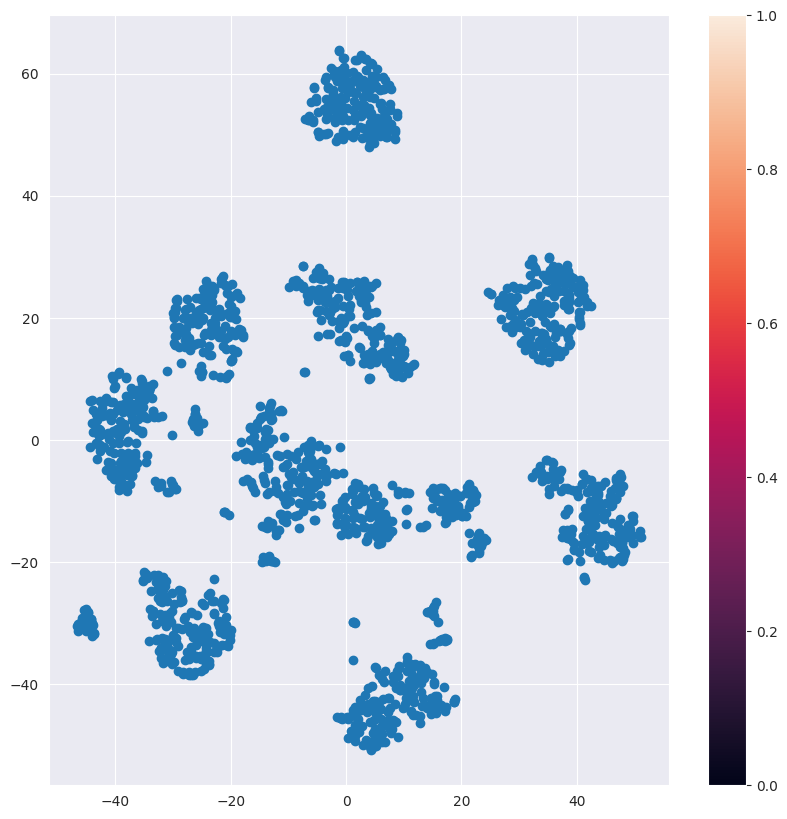

In [ ]:
t_sne = TSNE(random_state =42)
t_sne_fit = t_sne.fit_transform(X)

plt.figure(figsize = (10, 10))
plt.scatter(t_sne_fit[:,0], t_sne_fit[:, 1],  cmap ='viridis')
plt.colorbar()
plt.show()

##PCA vs TSNE

<ipython-input-55-c19841eb18b7>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_fit[:,0], pca_fit[:, 1],  cmap ='viridis')


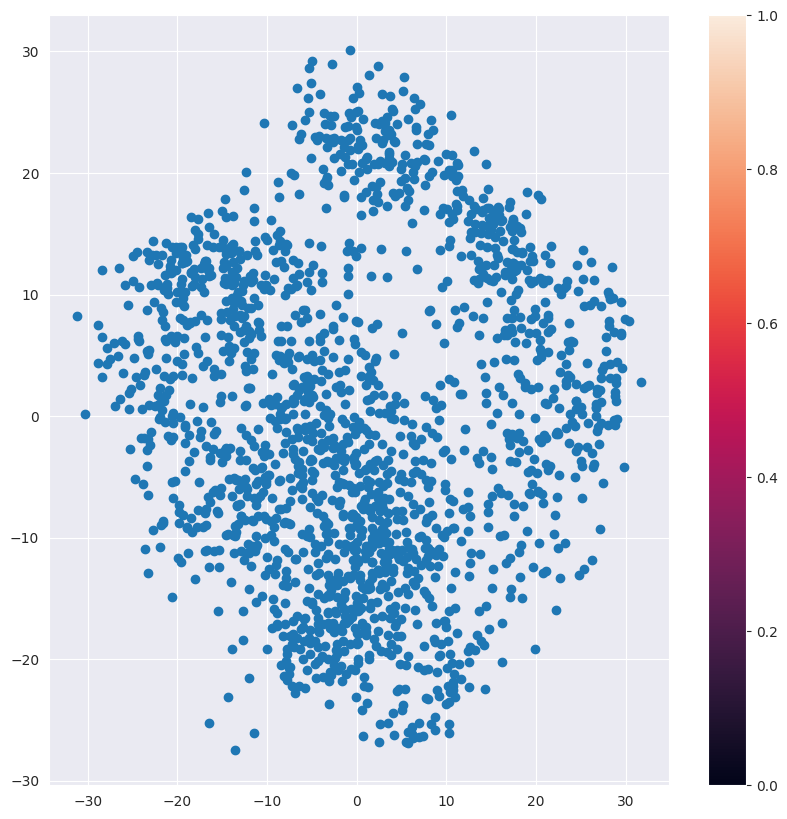

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(X)

plt.figure(figsize = (10, 10))
plt.scatter(pca_fit[:,0], pca_fit[:, 1],  cmap ='viridis')
plt.colorbar()
plt.show()

#k-Means

In [ ]:
num_data.head()

In [ ]:
num_data.shape

(41176, 10)

In [ ]:
for i in [2,3,5,7,8]:
  km = KMeans(n_clusters=i,
              random_state =42)
  km.fit(num_data)
  print(f'для {i} кластеров, силуэт равен {silhouette_score(num_data, km.labels_)}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


для 2 кластеров, силуэт равен 0.6770246279186571


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


для 3 кластеров, силуэт равен 0.5477254703640654


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


для 5 кластеров, силуэт равен 0.4175992895903379


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


для 7 кластеров, силуэт равен 0.43150499460486086


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


для 8 кластеров, силуэт равен 0.44991037611303875


#aglomerative clustering

In [ ]:
for i in [2,3,4,5,6,7]:
  agc = AgglomerativeClustering(n_clusters=i)
  agc.fit(num_data[:5000])
  print(f'для {i} кластеров, силуэт равен {silhouette_score(num_data[:5000], agc.labels_)}')

для 2 кластеров, силуэт равен 0.7348423339954443
для 3 кластеров, силуэт равен 0.7070935125722418
для 4 кластеров, силуэт равен 0.5755296129825771
для 5 кластеров, силуэт равен 0.5760325027117149
для 6 кластеров, силуэт равен 0.5819681635507994
для 7 кластеров, силуэт равен 0.4768767598704633


#DBSCAN

In [ ]:
for e in [10,20,50,70,100]:
  dbsc = DBSCAN(eps=e)
  dbsc.fit(num_data[:5000])
  print(f'найденные кластеры {set(dbsc.labels_)}')
  mask = np.zeros_like(dbsc.labels_, dtype = bool)
  mask[dbsc.core_sample_indices_] = True
  labels = dbsc.labels_
  #Кол-во кластеров
  print(f'При e = {e}, кол-во кластеров = {len(set(dbsc.labels_))-1}, кол-во выбросов = {list(labels).count(-1)}')

найденные кластеры {0, 1, 2, 3, 4, 5, 6, -1}
При e = 10, кол-во кластеров = 7, кол-во выбросов = 199
найденные кластеры {0, 1, 2, 3, 4, -1}
При e = 20, кол-во кластеров = 5, кол-во выбросов = 45
найденные кластеры {0, 1, -1}
При e = 50, кол-во кластеров = 2, кол-во выбросов = 17
найденные кластеры {0, 1, -1}
При e = 70, кол-во кластеров = 2, кол-во выбросов = 11
найденные кластеры {0, -1}
При e = 100, кол-во кластеров = 1, кол-во выбросов = 7


In [ ]:
set(dbsc.labels_)

##Визуализация

In [ ]:
  dbsc = DBSCAN(eps=10)
  dbsc.fit(num_data[:5000])

DBSCAN(eps=10)

In [ ]:
set(dbsc.labels_)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(num_data[:5000])

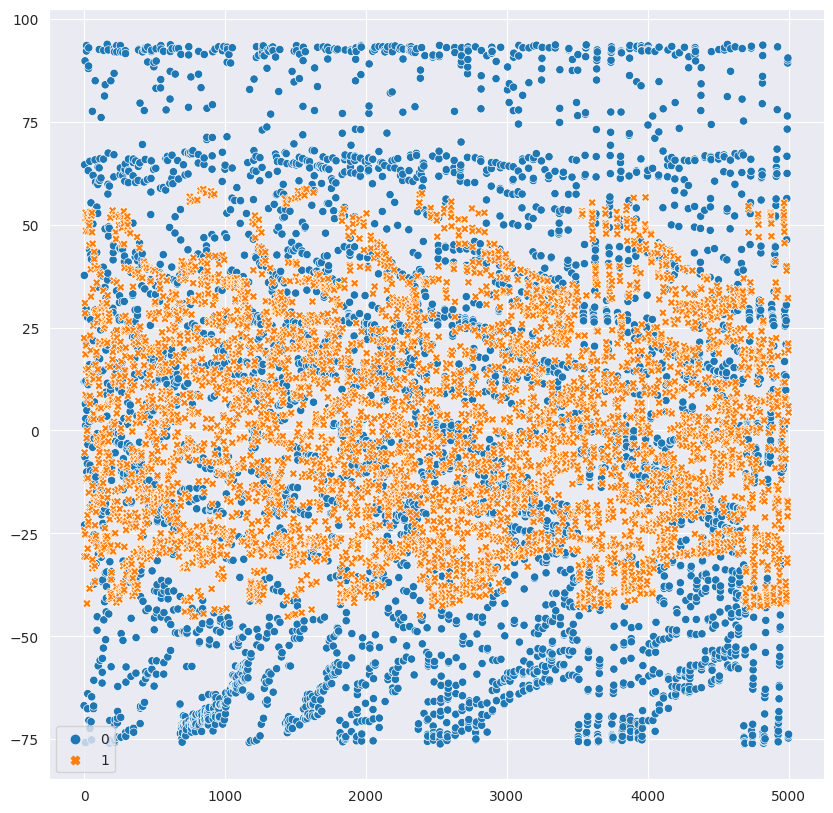

In [ ]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = t_sne_fit)
plt.show()

#Сравнение алгоритмов кластеризации